<a href="https://colab.research.google.com/github/natdebandi/text_mining_unrn/blob/main/use_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de modelos pre-entrenados para clasificación y finetunning


**Natalia Dedandi**


Vamos a usar las librerías y datasets de Hugging face

https://huggingface.co/

In [3]:
!pip install datasets seaborn
! pip install -U accelerate
! pip install -U transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

1- Crear una cuenta en HUGGINGFACE

https://huggingface.co/

In [4]:
from huggingface_hub import notebook_login
from google.colab import userdata

notebook_login()

In [5]:
pip install -U datasets

In [6]:
from datasets import load_dataset
import pandas as pd
from datetime import datetime, timedelta
from tqdm.auto import tqdm
from collections import Counter

Análisis exploratorio inicial

https://huggingface.co/datasets/piuba-bigdata/contextualized_hate_speech



*   ¿Cómo es este dataset?

*   ¿Que estructura es ds1?¿cuantos conjuntos tiene?






1- carguen el dataset

In [7]:
from datasets import load_dataset

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/26.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [8]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

El dataset 1 contiene 56869 tw etiquetados.
El dataset se dividió en 36420 de train, test:11343 y vaLidacion:9106

In [9]:
ds1_train=ds1["train"]
ds1_train

Dataset({
    features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
    num_rows: 36420
})

1) Dataset de etiquetado

https://huggingface.co/datasets/piuba-bigdata/contextualized_hate_speech

Este es el dataset original de etiquetado. Contiene los siguientes campos:

ID : identificador

TITLE: título de la noticia

TEXT: texto del tweet del comentario al Tweet original

CONTEXT: tweet original

HATEFUL: 1 hateful, 0 not hateful

BODY: texto de la noticia

CALLS: si se realizó o no un llamado a la acción

WOMEN: discriminación hacia mujeres

LGBTI: discriminación hacia grupos LGBTI

RACISM: discriminación asociada a racismo

CLASS: discriminación vinculada a pobreza, villas

POLITICS: odio o violencia vinculada a las ideas políticas

DISABLED: discriminación a las personas con discapacidad

APPEARENCE: discriminación en base al aspecto físico (incluye especialmente la gordofobia)

CRIMINAL: discriminación hacia personas en el sistema penal o similares

**Para el entrenamiento se usaron los siguientes tutoriales y documentos:**

Uso  de base el siguiente tutorial para hacer el finetuning:
https://huggingface.co/blog/sentiment-analysis-python
y este:
https://huggingface.co/docs/transformers/training


La idea es utilizar la librería tranbsformers de huggingface para hacerle finetuning a un BETO original, es decir la version de BERT pre-entrenada con español de GOOGLE pero que no haya sido reentrenado con ningún otro dataset.
Aqui para usar transformers de hugginface
https://github.com/huggingface/transformers?tab=readme-ov-file



In [10]:
import torch
torch.cuda.is_available()

True

### 1. pre-process data

In [9]:
 ds1['train'][0]

{'id': 343726,
 'title': 'Video: salió de la cárcel por el coronavirus y murió de un tiro el mismo día al festejar su libertad',
 'text': '@usuario Uno menos',
 'context_tweet': 'Video: salió de la cárcel por el coronavirus y murió de un tiro el mismo día al festejar su libertad https://t.co/UrJGRAdEvD',
 'HATEFUL': 1,
 'body': 'Un hombre de 46 años, que cumplía una condena en prisión y fue puesto en libertad por el coronavirus, murió el mismo día que dejó la cárcel baleado por un primo, durante los "festejos" por dejar la prisión.\n\nSari Salem Wardat, de 46 años, recibió un disparo desde atrás en un aparente accidente mientras caminaba hacia miembros de la familia y vecinos que se habían reunido para darle la bienvenida a su casa, en Jordania.\n\nUn video que circuló en las redes sociales \u200bmuestra a Sari llegando a su casa en un auto azul rodeado de tiros de "celebración". El primo se acerca de inmediato a Sari, que sostiene una pistola y la apunta hacia el cielo.\n\nEl detenido

In [10]:
##ME quedo solo con las columnas que necesito para la clasificación binaria
ds_train_small= ds1['train'].select_columns(["text","HATEFUL"])
ds_test_small= ds1['test'].select_columns(["text","HATEFUL"])
ds_val_small= ds1['dev'].select_columns(["text","HATEFUL"])

Nos quedamos con las columnas Text y Hateful y se renombra esta última ya que el modelo requiere que se llame "label"

In [11]:
##aca les coloco el mismo nombre que espera el modelo (me parece cualquiera pero no logre que ande sino)
ds_train_small=ds_train_small.rename_column("HATEFUL", "label")
ds_test_small=ds_test_small.rename_column("HATEFUL", "label")
ds_val_small=ds_val_small.rename_column("HATEFUL", "label")

In [12]:
ds_train_small

Dataset({
    features: ['text', 'label'],
    num_rows: 36420
})

In [14]:
ds_test_small

Dataset({
    features: ['text', 'label'],
    num_rows: 11343
})

In [16]:
# Tomo una muestra de 50 mil para que sea más rapido el entrenamiento
#  uso una semilla, para que pueda reproducirlo, es decir para que mi muestra siempre sea la misma.
# cada uno elija su numero

import random

# Set the random seed for reproducibility
random.seed(14)

# Sample 50,000 random examples from ds_test_small
indices_to_sample = random.sample(range(len(ds_test_small)), 10000)
ds_train_small = ds_train_small.select(indices_to_sample)

ds_train_small


Dataset({
    features: ['text', 'label'],
    num_rows: 10000
})

In [17]:

from transformers import BertForMaskedLM, BertTokenizer

Utiizo las librerías de transformers para preparar los datos de entrenamiento

Lo primero es tokenizar en función del modelo seleccionado, en nuestro caso BETO

In [18]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased")

tokenizer_config.json:   0%|          | 0.00/310 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/650 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/486k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

Le aplico la función tokenizer del modelo BETO a mis conjuntos, el de entrenamiento, el de test y el de validación

In [19]:
def preprocess_function(examples):
   return tokenizer(examples["text"], truncation=True)

tokenized_train = ds_train_small.map(preprocess_function, batched=True)
tokenized_test = ds_test_small.map(preprocess_function, batched=True)
tokenized_val = ds_val_small.map(preprocess_function, batched=True)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/11343 [00:00<?, ? examples/s]

Map:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [22]:
tokenized_train[0]

{'text': '@usuario Hay INFOBAE, hay quien le importa???? Solo a los que discriminan a personas con otra inclinación sexual? A mi no me interesa y le deceo toda la felicidad que se merecen.',
 'label': 0,
 'input_ids': [4,
  985,
  8563,
  1311,
  27529,
  1152,
  30955,
  1019,
  1311,
  1925,
  1165,
  2486,
  1059,
  1059,
  1059,
  1059,
  1628,
  1012,
  1067,
  1041,
  12389,
  30959,
  1012,
  1845,
  1048,
  1751,
  18106,
  5296,
  1059,
  1012,
  1136,
  1054,
  1094,
  7904,
  1040,
  1165,
  1759,
  1784,
  2029,
  1032,
  8948,
  1041,
  1057,
  15200,
  1008,
  5],
 'token_type_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1

Prueben varios casos

In [23]:
tokenized_train[2100]

{'text': '@usuario Debería ser de por vida lpmqlrmp.',
 'label': 0,
 'input_ids': [4,
  985,
  8563,
  2475,
  1170,
  1009,
  1076,
  1613,
  23090,
  30967,
  30975,
  30962,
  30960,
  1138,
  1008,
  5],
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

La siguiente función transforma los datos de entrenamiento agregandole el padding

Se usará luego en el Trainer

In [24]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## 2 Entreno el modelo.

Voy a entrenar el modelo con el TRAINER de transformers. Instancio el modelo pre-entrenado BETO y aca selecciono 2 labels ya que se hace una clasificación binaria

Modelo: dccuchile/bert-base-spanish-wwm-uncased

Ustedes tendrán que probar otros modelos


In [25]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("dccuchile/bert-base-spanish-wwm-uncased", num_labels=2)


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
#esto es opcional
#import wandb
#wandb.init(mode="disabled")

In [26]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compute_metrics(eval_pred):

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metrics = {}

    metrics['Accuracy'] = accuracy_score(labels, predictions)
    metrics['Precision'] = precision_score(labels, predictions)
    metrics['Recall'] = recall_score(labels, predictions)
    metrics['f1'] = f1_score(labels, predictions)
    metrics['AUC'] = roc_auc_score(labels, predictions)

    return(metrics)



Revision de parametros de TRAINER
https://huggingface.co/docs/transformers/main_classes/trainer




In [27]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="beto_ejemplo_clase",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    report_to="none",
    load_best_model_at_end=True,
    push_to_hub=True,
)

In [28]:

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)



In [29]:
# Train pre-trained model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc
1,0.353300,0.305188,0.891475,0.790554,0.428492,0.555756,0.703561
2,0.252900,0.329123,0.886714,0.691904,0.513634,0.589588,0.735290


TrainOutput(global_step=1250, training_loss=0.2893808349609375, metrics={'train_runtime': 344.4672, 'train_samples_per_second': 58.061, 'train_steps_per_second': 3.629, 'total_flos': 598355650991040.0, 'train_loss': 0.2893808349609375, 'epoch': 2.0})

¿Cuanto tiempo les tardó el modelo?
¿CUantos EPOCH hizo? ¿Qué creen que es un epoch?

In [30]:
trainer.evaluate()

{'eval_loss': 0.30518776178359985,
 'eval_Accuracy': 0.8914749184519086,
 'eval_Precision': 0.7905544147843943,
 'eval_Recall': 0.4284919309961046,
 'eval_f1': 0.555756044749188,
 'eval_AUC': 0.7035608617896928,
 'eval_runtime': 36.244,
 'eval_samples_per_second': 312.962,
 'eval_steps_per_second': 19.562,
 'epoch': 2.0}

Esta fue la evaluación del entrenamiento que realicé yo usando todos los datos y no una muestra. ¿que opinan?



{'eval_loss': 0.6295255422592163,

 'eval_Accuracy': 0.891563078550648,

 'eval_Precision': 0.6768558951965066,

 'eval_Recall': 0.6037840845854201,

 'eval_f1': 0.6382352941176471,

 'eval_AUC': 0.7747602593469737,

 'eval_runtime': 36.0436,

 'eval_samples_per_second': 314.702,

 'eval_steps_per_second': 19.671,

 'epoch': 5.0}

Vayan a su cuenta de Hugginface y vean si está el modelo.


Ahora queremos usar el modelo para clasificar nuevo texto

In [35]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

checkpoint = "natdebandi/beto_ejemplo_clase"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

my_model = AutoModelForSequenceClassification.from_pretrained(checkpoint)




In [37]:
texto_prueba=["son todos unos boludos"]

In [39]:
import torch

tokens = tokenizer(texto_prueba, padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    outputs = my_model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)

predictions


tensor([0])

In [40]:
examples = ["hay que matarlos a todos", "Vamos a la plaza a marchar","Los chinos son todos sucios","Culpa de los bolitas"]

In [41]:
for example in examples:
  tokens = tokenizer([example], padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
    outputs = my_model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)

  if predictions[0].item() == 0:
    print(f'"{example}" : NO HATEFUL')
  else:
    print(f'"{example}" : HATEFUL')


"hay que matarlos a todos" : HATEFUL
"Vamos a la plaza a marchar" : NO HATEFUL
"Los chinos son todos sucios" : HATEFUL
"Culpa de los bolitas" : HATEFUL


¿Que pasa si uso el modelo BETO sin finetunning?

In [42]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

checkpoint = "distilbert/distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

model_d = AutoModelForSequenceClassification.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
for example in examples:
  tokens = tokenizer([example], padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
    outputs = model_d(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)

  if predictions[0].item() == 0:
    print(f'"{example}" : NO HATEFUL')
  else:
    print(f'"{example}" : HATEFUL')

"hay que matarlos a todos" : HATEFUL
"Vamos a la plaza a marchar" : HATEFUL
"Los chinos son todos sucios" : HATEFUL
"Culpa de los bolitas" : HATEFUL


Prueben otros modelos.. ¿cuales pueden usar?


Teniamos otro conjunto de evaluación en la base original

Podemos tratar de aplicarle el clasificador a este conjunto. Podemos verlo primero


In [11]:
from datasets import load_dataset

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")


In [12]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [14]:
ds1['dev']

Dataset({
    features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
    num_rows: 9106
})

In [15]:
ds_dev=ds1['dev'].select_columns(["id","text","HATEFUL"])

In [37]:
# Esto es una forma clásica de obtener los % con un group by usando pandas

import pandas as pd

# Assuming 'ds1' and 'ds_dev' are defined as in the provided code.
ds_dev_df = pd.DataFrame(ds_dev)

# Group by 'HATEFUL' and count occurrences
hateful_counts = ds_dev_df.groupby('HATEFUL')['id'].count()
hateful_counts


,id
HATEFUL,
0,7719
1,1387


In [38]:
# Calculate percentages
total_count = len(ds_dev_df)
hateful_percentages = (hateful_counts / total_count) * 100

hateful_percentages

,id
HATEFUL,
0,84.768285
1,15.231715


In [45]:
#tomo una muestra para que no demore tanto
import random

# Set the random seed for reproducibility
random.seed(14)

# Sample 500 random examples from ds_dev
indices_to_sample = random.sample(range(len(ds_dev)), 1000)
ds_dev_sampled = ds_dev.select(indices_to_sample)

ds_dev_sampled


Dataset({
    features: ['id', 'text', 'HATEFUL'],
    num_rows: 1000
})

Cuento cuantos y el % para ver si está bien

In [46]:
# Assuming 'ds1' and 'ds_dev' are defined as in the provided code.
ds_dev_df = pd.DataFrame(ds_dev_sampled)

# Group by 'HATEFUL' and count occurrences
hateful_counts = ds_dev_df.groupby('HATEFUL')['id'].count()
total_count = len(ds_dev_df)
hateful_percentages = (hateful_counts / total_count) * 100

hateful_percentages


,id
HATEFUL,
0,85.2
1,14.8


In [48]:
# Assuming 'ds_dev' is defined as in the provided code.
ds_dev_df = pd.DataFrame(ds_dev_sampled)

# Find the first example with HATEFUL = 1
hateful_example = ds_dev_df[ds_dev_df['HATEFUL'] == 1].iloc[0]

hateful_example["text"]


'@usuario Bala y a la bolsa. Estas lacras no se recuperan nunca mas!!!'

In [51]:
ds_dev_sampled[967]

{'id': 407976,
 'text': '@usuario Es que sos incogible..quien te va a hacer un hijo.....algun ciegoooo',
 'HATEFUL': 1}

Aplico el modelo al conjunto

In [52]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

checkpoint = "natdebandi/beto_ejemplo_clase"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

my_model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [54]:
#se aplica a cada del sample caso el modelo y se guarda otra columna

hateful_t = []
for i in tqdm(range(len(ds_dev_sampled))):
  text = ds_dev_sampled[i]['text']
  tokens = tokenizer([text], padding=True, truncation=True, return_tensors="pt")
  with torch.no_grad():
    outputs = my_model(**tokens)
    predictions = torch.argmax(outputs.logits, dim=-1)
  hateful_t.append(predictions[0].item())




  0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: Failed to concatenate on axis=1 because tables don't have the same number of rows

In [57]:
len(hateful_t)


1000

In [58]:
ds_dev_sampled = ds_dev_sampled.add_column("hateful_t", hateful_t)
ds_dev_sampled

Flattening the indices:   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'text', 'HATEFUL', 'hateful_t'],
    num_rows: 1000
})

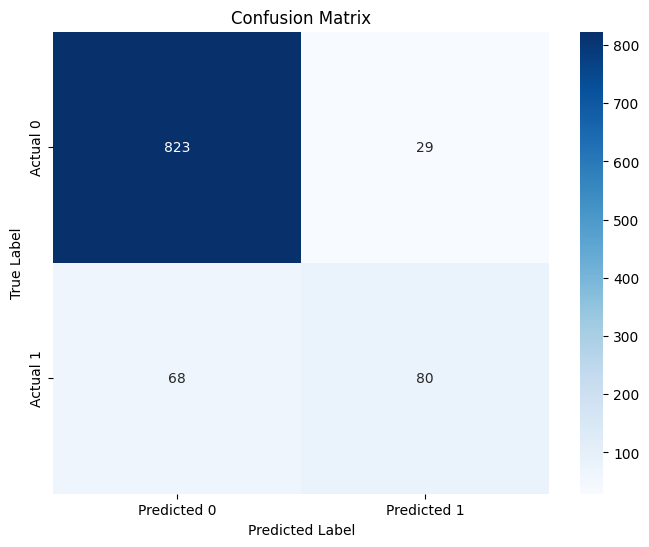

In [59]:
# prompt: calcular la matriz de confusion usando hateful y hateful_t

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ds_dev_sampled' and 'hateful_t' are defined as in the previous code.

# Extract true labels and predicted labels
y_true = ds_dev_sampled['HATEFUL']
y_pred = ds_dev_sampled['hateful_t']

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [60]:
# Extract true labels and predicted labels
y_true = ds_dev_sampled['HATEFUL']
y_pred = ds_dev_sampled['hateful_t']

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.903
Precision: 0.7339449541284404
Recall: 0.5405405405405406
F1 Score: 0.622568093385214
